In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import datetime as dt
import pandas as pd
import numpy as np
import requests

In [2]:
url='https://finance.naver.com/sise/sise_market_sum.nhn'
resp=requests.get(url)
soup=BeautifulSoup(resp.content)
tr=soup.find_all('tr')
listt=[] 
for i in tr:
    try:
        link=i.find('a')['href']
        listt.append(link)      
    except:
        pass
   
print(listt)


['/item/main.nhn?code=005930', '/item/main.nhn?code=000660', '/item/main.nhn?code=005935', '/item/main.nhn?code=005380', '/item/main.nhn?code=068270', '/item/main.nhn?code=051910', '/item/main.nhn?code=012330', '/item/main.nhn?code=005490', '/item/main.nhn?code=017670', '/item/main.nhn?code=055550', '/item/main.nhn?code=207940', '/item/main.nhn?code=051900', '/item/main.nhn?code=035420', '/item/main.nhn?code=105560', '/item/main.nhn?code=028260', '/item/main.nhn?code=000270', '/item/main.nhn?code=018260', '/item/main.nhn?code=015760', '/item/main.nhn?code=006400', '/item/main.nhn?code=032830', '/item/main.nhn?code=034730', '/item/main.nhn?code=096770', '/item/main.nhn?code=033780', '/item/main.nhn?code=003550', '/item/main.nhn?code=066570', '/item/main.nhn?code=000810', '/item/main.nhn?code=086790', '/item/main.nhn?code=035720', '/item/main.nhn?code=036570', '/item/main.nhn?code=010950', '/item/main.nhn?code=316140', '/item/main.nhn?code=090430', '/item/main.nhn?code=011170', '/item/ma

In [7]:
for i in listt[:11]:
    url='https://finance.naver.com/item/coinfo.nhn?code='
    resp=requests.get(url+i[20:])
    soupp=BeautifulSoup(resp.content) 
    tr=soupp.find_all('tr')
    for i in tr:
        try:
            num=tr.find_all('td',class_='num')
            print(num)
        except:
            pass   

In [8]:
mylist=[]
code_list=[]
for i in range(11):
    code_list.append(listt[:11][i][20:])
    url='https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd='
    resp=requests.get(url+listt[:11][i][20:])
    soupp=BeautifulSoup(resp.content) 
    tr=soupp.find_all('tr')    
    for i in tr[9:10]:
        try:
            title=i.find_all('th', class_="txt")
            num=i.find_all('td',class_='num')
            mylist.append(num[0].text.replace('\t','').replace('\r\n',''))
            
        except:
            pass 
print(mylist)   

['5,969,782,550주 / 74.59%', '728,002,365주 / 73.55%', '5,969,782,550주 / 74.59%', '213,668,187주 / 65.55%', '128,329,070주 / 75.83%', '70,592,343주 / 64.28%', '95,306,694주 / 66.41%', '87,186,835주 / 69.37%', '80,745,711주 / 52.31%', '474,199,587주 / 80.95%', '66,165,000주 / 24.76%']


In [9]:
milist=[]
주=[]
퍼센트=[]
for i in range(11):
    milist=mylist[i].split('/')
    주.append(milist[0].replace('주','').replace(',','').strip())
    퍼센트.append(milist[1].replace('%','').strip())

dictt={}
dictt={
    '발행주식수':주,
    '유동비율':퍼센트
}
print(dictt)

{'발행주식수': ['5969782550', '728002365', '5969782550', '213668187', '128329070', '70592343', '95306694', '87186835', '80745711', '474199587', '66165000'], '유동비율': ['74.59', '73.55', '74.59', '65.55', '75.83', '64.28', '66.41', '69.37', '52.31', '80.95', '24.76']}


In [10]:
df=pd.DataFrame(dictt)

In [11]:
df

,발행주식수,유동비율
0,5969782550,74.59
1,728002365,73.55
2,5969782550,74.59
3,213668187,65.55
4,128329070,75.83
5,70592343,64.28
6,95306694,66.41
7,87186835,69.37
8,80745711,52.31
9,474199587,80.95


In [12]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET

In [13]:
def getStockPrice(StockCode, Count = 500) :
    ret = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close','volumn'])
    
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count={}&requestType=0"
    url = url.format(StockCode, Count)
    response = requests.get(url)
    
    e = ET.fromstring(response.text.replace('\n','').replace('\t',''))
    
    stock_history = []
    for item in e.find('chartdata').findall('item') :
        data = item.get('data').split('|')
        ret.loc[len(ret)] = data
        
    return ret

In [14]:
frame=pd.DataFrame(columns=code_list)

frame
for i in range(11):
    try:
        aa=getStockPrice(code_list[i])
        
        frame[code_list[i]]=aa['close']
    except:
        pass   

In [15]:
frame['date']=aa['date']

In [16]:
frame.set_index('date')

,005930,000660,005935,005380,068270,051910,012330,005490,017670,055550,207940
date,,,,,,,,,,,
20170619,46560,62800,37460,167000,106386,279000,261000,271500,247500,50200,240500
20170620,48140,64000,38420,166500,112073,275500,257000,271000,249500,49600,234000
20170621,47480,64800,38020,160500,112857,280000,254500,267000,254500,48450,233000
20170622,47960,65000,38000,161500,110896,287000,258000,269000,263000,48750,238000
20170623,47620,65000,37980,164000,111092,283500,257000,270500,258000,48800,249000
20170626,48280,67500,38300,164000,111778,282500,255500,272500,258000,48550,282500
20170627,48300,69200,38420,160500,112857,283000,253500,275000,264000,48500,283500
20170628,47700,67200,37620,160000,111778,280500,254500,284000,266000,49900,281500
20170629,47940,68500,38000,161000,110896,282000,255000,283500,261500,49900,297000


In [29]:
for p in range(11):
    for i in range(500):
        frame[code_list[p]][i]=int(frame[code_list[p]][i])*int(df['발행주식수'][0])*float(df['유동비율'][0])

frame=frame.set_index('date')

In [35]:
lissst=[]
for i in range(500):
    lissst.append(frame.iloc[i].sum())
    
frame['sum']=lissst
    

In [42]:
liist=[]
for i in range(500):
    liist.append(frame['sum'][i]/frame['sum'][0]*100)
    
frame['지수']=liist
frame.index=pd.to_datetime(frame.index)

In [43]:
frame

,005930,000660,005935,005380,068270,051910,012330,005490,017670,055550,207940,sum,지수
date,,,,,,,,,,,,,
2017-06-19,1.8305e+51,2.46897e+51,1.47273e+51,6.56558e+51,4.18255e+51,1.09688e+52,1.02612e+52,1.0674e+52,9.73042e+51,1.9736e+51,2.1234e+40,6.012835e+52,100.000000
2017-06-20,1.89262e+51,2.51615e+51,1.51048e+51,6.54592e+51,4.40613e+51,1.08312e+52,1.01039e+52,1.06543e+52,9.80905e+51,1.95002e+51,2.06601e+40,6.021983e+52,100.152151
2017-06-21,1.86667e+51,2.5476e+51,1.49475e+51,6.31003e+51,4.43695e+51,1.10082e+52,1.00056e+52,1.04971e+52,1.00056e+52,1.9048e+51,2.05718e+40,6.007728e+52,99.915065
2017-06-22,1.88554e+51,2.55546e+51,1.49396e+51,6.34935e+51,4.35986e+51,1.12834e+52,1.01432e+52,1.05757e+52,1.03398e+52,1.9166e+51,2.10133e+40,6.090285e+52,101.288082
2017-06-23,1.87217e+51,2.55546e+51,1.49318e+51,6.44763e+51,4.36756e+51,1.11458e+52,1.01039e+52,1.06347e+52,1.01432e+52,1.91856e+51,2.19845e+40,6.068214e+52,100.921011
2017-06-26,1.89812e+51,2.65375e+51,1.50576e+51,6.44763e+51,4.39453e+51,1.11064e+52,1.00449e+52,1.07133e+52,1.01432e+52,1.90874e+51,2.49423e+40,6.081644e+52,101.144366
2017-06-27,1.89891e+51,2.72059e+51,1.51048e+51,6.31003e+51,4.43695e+51,1.11261e+52,9.96631e+51,1.08116e+52,1.03791e+52,1.90677e+51,2.50306e+40,6.106683e+52,101.560802
2017-06-28,1.87532e+51,2.64196e+51,1.47902e+51,6.29037e+51,4.39453e+51,1.10278e+52,1.00056e+52,1.11654e+52,1.04577e+52,1.96181e+51,2.4854e+40,6.129961e+52,101.947946
2017-06-29,1.88475e+51,2.69307e+51,1.49396e+51,6.32969e+51,4.35986e+51,1.10868e+52,1.00253e+52,1.11458e+52,1.02808e+52,1.96181e+51,2.62225e+40,6.126179e+52,101.885046


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

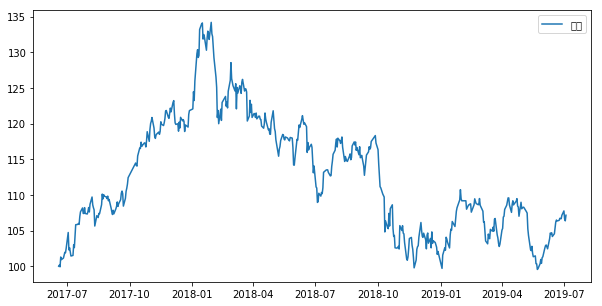

In [46]:
plt.figure(figsize=(10,5))
plt.plot(frame['지수'])
plt.legend(loc=0)
